In [ ]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,Dropout
from keras import Sequential
from keras.preprocessing.image import ImageDataGenerator

In [ ]:
path = '/content/drive/MyDrive/Colab Notebooks/Cat Dog/cat_dog_data'
path_to_cats = path + '/cat/'
path_to_dogs = path + '/dog/'

In [ ]:
img = []
labels = []
size = (128, 128)

def data_preproc(fold, label):
  files = os.listdir(fold)
  for i in files:
    image = cv2.imread(fold + i)
    if image is not None:
      image = cv2.resize(image, size)
      img.append(image)
      labels.append(label)

data_preproc(path_to_dogs, 1)
data_preproc(path_to_cats, 0)

In [ ]:
img = np.array(img).astype(np.float32)
labels = np.array(labels).astype(np.float32)
print(img.shape)
print(labels.shape)

(5542, 128, 128, 3)
(5542,)


In [ ]:
img_norm = img/255

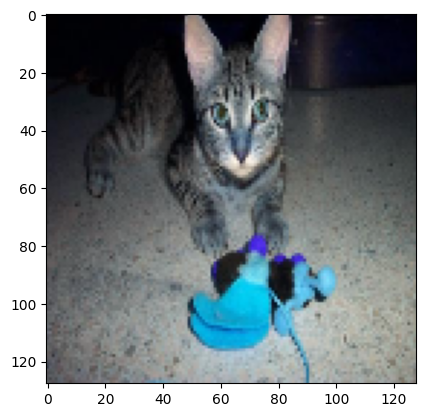

In [ ]:
im = img_norm[234]
plt.imshow(im)
im = img_norm[4563]
plt.imshow(im)

In [ ]:
img_train, img_test, label_train, label_test = train_test_split(img_norm, labels, test_size = 0.3)

In [ ]:
oneh_trainlabel = to_categorical(label_train)
oneh_testlabel = to_categorical(label_test)

In [ ]:
def first_model(input_shape) :
  model = Sequential()
  model.add(Conv2D(filters = 32, kernel_size = (3, 3), padding = "valid", activation = "relu", input_shape = input_shape))
  model.add(BatchNormalization())
  model.add(MaxPooling2D())
  model.add(Conv2D(filters = 64, kernel_size = (3, 3), padding = "valid", activation = "relu", input_shape = input_shape))
  model.add(BatchNormalization())
  model.add(MaxPooling2D())
  model.add(Conv2D(filters = 128, kernel_size = (3, 3), padding = "valid", activation = "relu", input_shape = input_shape))
  model.add(BatchNormalization())
  model.add(MaxPooling2D())
  model.add(Flatten())
  model.add(Dense(128, activation = "relu"))
  model.add(Dense(64, activation = "relu"))
  model.add(Dense(2, activation = "sigmoid"))
  return model

In [ ]:
fmodel = first_model((128, 128, 3))
fmodel.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])
fmodel.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 batch_normalization_3 (Bat  (None, 126, 126, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 63, 63, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 batch_normalization_4 (Bat  (None, 61, 61, 64)        256       
 chNormalization)                                                
                                                      

In [ ]:
#result = fmodel.fit(img_train, oneh_trainlabel)

In [ ]:
#fmodel.evaluate(img_test, oneh_testlabel)

In [ ]:
batch_size = 10
data_gen = ImageDataGenerator()
batches = data_gen.flow(img_train, oneh_trainlabel, batch_size = batch_size)

In [ ]:
fmodel.fit_generator(batches, epochs = 10)

Epoch 1/10


<ipython-input-33-67586b942768>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  fmodel.fit_generator(batches, epochs = 10)


388/388 [==============================] - 8s 12ms/step - loss: 0.8537 - accuracy: 0.6192
Epoch 2/10
388/388 [==============================] - 8s 20ms/step - loss: 0.5975 - accuracy: 0.7046
Epoch 3/10
388/388 [==============================] - 6s 15ms/step - loss: 0.5128 - accuracy: 0.7566
Epoch 4/10
388/388 [==============================] - 4s 11ms/step - loss: 0.4180 - accuracy: 0.8064
Epoch 5/10
388/388 [==============================] - 6s 16ms/step - loss: 0.3252 - accuracy: 0.8590
Epoch 6/10
388/388 [==============================] - 6s 14ms/step - loss: 0.2146 - accuracy: 0.9152
Epoch 7/10
388/388 [==============================] - 4s 11ms/step - loss: 0.1306 - accuracy: 0.9531
Epoch 8/10
388/388 [==============================] - 5s 12ms/step - loss: 0.1154 - accuracy: 0.9562
Epoch 9/10
388/388 [==============================] - 5s 13ms/step - loss: 0.0826 - accuracy: 0.9696
Epoch 10/10
388/388 [==============================] - 4s 11ms/step - loss: 0.0670 - accuracy: 0.9773


In [ ]:
fmodel.evaluate(img_test, oneh_testlabel)

52/52 [==============================] - 1s 12ms/step - loss: 1.1599 - accuracy: 0.7498


[1.159853458404541, 0.7498496770858765]

In [ ]:
data_gen_n = ImageDataGenerator(rotation_range = 8, width_shift_range = 0.08, shear_range = 0.3, height_shift_range = 0.08, zoom_range = 0.08)
batches_n = data_gen_n.flow(img_train, oneh_trainlabel, batch_size = batch_size)

In [ ]:
fmodel.fit_generator(batches_n, epochs = 10)

Epoch 1/10


<ipython-input-37-477d2b7df12a>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  fmodel.fit_generator(batches_n, epochs = 10)


388/388 [==============================] - 22s 57ms/step - loss: 0.4773 - accuracy: 0.7974
Epoch 2/10
388/388 [==============================] - 23s 60ms/step - loss: 0.3926 - accuracy: 0.8293
Epoch 3/10
388/388 [==============================] - 21s 54ms/step - loss: 0.3593 - accuracy: 0.8425
Epoch 4/10
388/388 [==============================] - 20s 52ms/step - loss: 0.3250 - accuracy: 0.8644
Epoch 5/10
388/388 [==============================] - 20s 53ms/step - loss: 0.2938 - accuracy: 0.8763
Epoch 6/10
388/388 [==============================] - 21s 55ms/step - loss: 0.2753 - accuracy: 0.8886
Epoch 7/10
388/388 [==============================] - 20s 52ms/step - loss: 0.2450 - accuracy: 0.8989
Epoch 8/10
388/388 [==============================] - 20s 53ms/step - loss: 0.2422 - accuracy: 0.9023
Epoch 9/10
388/388 [==============================] - 22s 57ms/step - loss: 0.2130 - accuracy: 0.9149
Epoch 10/10
388/388 [==============================] - 21s 53ms/step - loss: 0.2065 - accurac

In [ ]:
fmodel.evaluate(img_test, oneh_testlabel)


52/52 [==============================] - 1s 11ms/step - loss: 0.5980 - accuracy: 0.7931


[0.5980109572410583, 0.793144941329956]

In [90]:
i = "/content/drive/MyDrive/Colab Notebooks/i (3).webp"
image = cv2.imread(i)
if image is not None:
  image = cv2.resize(image, size)

1/1 [==============================] - 0s 19ms/step
[[0. 1.]]
DOG


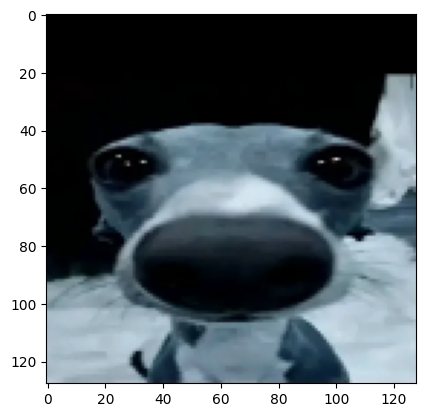

In [91]:
prediction = fmodel.predict(image.reshape(1, 128, 128, 3))
print(prediction)

if prediction[0][0] > prediction[0][1] :
  print("CAT")
else :
  print("DOG")
plt.imshow(image)